# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
import math

df = pd.read_csv('data/human_body_temperature.csv')

In [139]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [140]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [141]:
df.shape

(130, 3)

# Question 1. 
## Is the distribution of the body temperature normal?

Since comparing the histogram to the PDF can be different due to binning bias, it is better to compare the ecdf of the 
data to the theoretical normal ecdf by superimposing these two plots and see how much they overlap. As shown in the plot below, it is approximately normal despite the small offset in the 60% - 80% range of the CDF.

In [142]:
#This is the ecdf function that was written from the data camp assignment from Chapter 8.1.
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

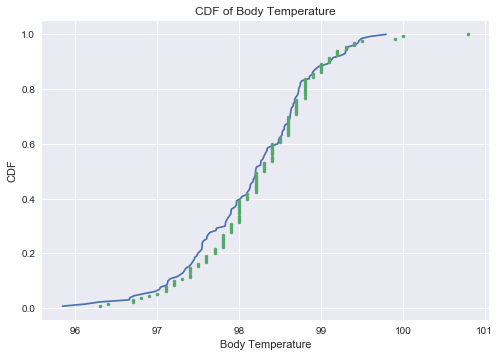

In [143]:
#Computed the mean and the std to use as the parameters to generate the normal samples
mean = np.mean(df.temperature)
std = np.std(df.temperature)
samples = np.random.normal(mean, std, size = 130)

#call the ecdf function on the temperature series and the samples generate from above
x, y = ecdf(df.temperature)
x_theo, y_theo = ecdf(samples)

#plot both the theoretical cdf and the df.temperature cdf
_ = plt.plot(x_theo, y_theo)
_ = plt.plot(x, y, marker = '.', linestyle='none')
plt.xlabel('Body Temperature')
plt.ylabel('CDF')
plt.title('CDF of Body Temperature')
sns.set()
plt.show()

# Question 2. 
## Is the sample size large? 

The benchmark sample size is n >= 30 for the Central Limit Theorem to apply. Since our sample size is n = 130, it is indeed large enough.

## Are the observations independent?

Since the observations of the dataset are based off of measurements on individuals in a population, the observations in this dataset are therefore independent.

# Question 3. 
## Is the true population mean really 98.6 degrees F?
In order to answer this question, Hypothesis Testing will be performed. To begin, lets state the hypotheses. The null hypothesis will be that the true population mean is equal to 98.6 degrees F while the alternative hypothesis will be the true population mean is not equal to 98.6 degrees F. This will be a two-sided alternative hypothesis.

$H_{o}$ : $\mu$ = 98.6

$H_{A}$ : $\mu$ $\ne$ 98.6

In order to assess whether or not there is enough evidence to reject the null hypothesis, a significance level $\alpha$ will need to be preset. For this example,
$\alpha$ = .05. If the computed p value from the hypothesis testing is determine to lower than the significance level $\alpha$, then the null hypothesis will be rejected and the alternative hypothesis will be accepted. Otherwise, there is not enough evidence to reject the null hypothesis. 


### Would you use a one-sample or two-sample test? Why?
A one-sample test should be used because the question asks to compare one set of data to a single number, the mean body temperature. 

### In this situation, is it appropriate to use the  t  or  z  statistic?
In this case, it is more appropriate to use the t-score statistic because in order to use a z statistic, the standard deviation of the sampling distribution is needed as shown below. Since that value is unknown, the z statistic cannot be used. However, with a large enough sample size, the standard deviation of the sampling distribution can be computed using the standard deviation of the population divided by the square root of the sample. But since that value is also unknown, the t statistic will need to be used since an estimate can be used to estimate the unknown standard deviation. 

### Now try using the other test. How is the result be different? Why?
The result were the same. Both test concluded that the null hypothesis should be rejected and that the alternative hypothesis should be accepted. This is the case because the z value and the t value are the same when $(n \geq 30)$ and the standard deviation of the sampling distribution can be estimated by the sample standard deviation. When $(n \leq 30)$, $\frac{\bar{x} - \mu_{o}}{\delta /\sqrt{n} }$ will be t distributed.

## One Sample t test

In order to use the t statistic to do a significance testing, the following three conditions will need to be met:
   * Random: The sample is randomly sampled.
   * Normal: The sampling distribution of the $\bar{x}$ needs to be approximately normal or f the sample size is reasonably large $(n \geq 30)$.
   * Independent: observation from the dataset needs to be independent.
   
The three conditions are met as discussed below.
   * Random: Assume the given dataset is randomly sampled.
   * Normal: The sample size is n $\geq 130$.
   * Independent: Assuming that the population data is more than 1300, our sample size will not be more than 10% and therefore the condition is met.
   
t = $\frac{\bar{x} - \mu_{o}}{\delta /\sqrt{n} }$

As seen below, 

t = -5.475925202078116

p value = 2.4106320415561276e-07

Since the p value is below the significance level preset at .05, the null hypothesis will be rejected and the alternative hypothesis will be accepted.

In [144]:
true_mean = 98.6
st.ttest_1samp(df.temperature, true_mean)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

## One Sample z test

In order to use the z statistic, $n \geq 30$. Since the sample size of this data is 130, the normal condition is met and the z value can be approximated with the sample standard deviation. If the sample size was not greater than 30, then $\frac{\bar{x} - \mu_{o}}{\delta /\sqrt{n} }$ will be t distributed. Below shows the two equations used to determine the z value. The second one will be used as the standard deviation is estimated.

z = $\frac{\bar{x} - \mu_{o}}{\sigma }$

z = $\frac{\bar{x} - \mu_{o}}{\delta /\sqrt{n} }$

As seen below,

z = -5.475925202078116

zp_value = 4.3523151658821886e-08

From using the z statistic, it can be seen that the null hypothesis will also be rejected and the alternative hypothesis will be accepted since the p value for the z statistic is lower than the significance level that was presetted in the beginning.

In [145]:
sample_mean = np.mean(df.temperature)
sample_std = np.std(df.temperature)
z = (sample_mean - true_mean)*math.sqrt(130)/(sample_std)
zp_value = st.norm.cdf(z)*2
z, zp_value

(-5.475925202078116, 4.3523151658821886e-08)

# 4. Draw a small sample of size 10 from the data and repeat both tests.

## Which one is the correct one to use?
The correct one here to use is the t statistic. When the sample size is small, the hypothesis test for a population mean will be t distributed.

## What do you notice? What does this tell you about the difference in application of the  t  and  z  statistic?
There is a slight difference in the p values. It is seen that the p value from the t test has a higher probability than the p value computed from the z test. This reinforces the fact that a t test should be used when a sample size is less than 10 because it requires more evidence to reject the null hypothesis using the t test than it does with the z test. Using the z test when the sample size is small can increase Type I error.

## One Sample t test with n = 10

The t statistic test is repeated with the sample size at n = 10. The premise is the same as the t test above with the sample size changed. 

t = $\frac{ \bar{x} - \mu_{o} }{\delta /\sqrt{n} }$

As seen below, 

t = 0.49035745182334267

p value = 0.63561347097563603

Since the p value is greater than the significance value presetted above, there is not enough evidence to reject the null hypothesis.

In [146]:
bs = np.random.choice(df.temperature, size = 10)
st.ttest_1samp(bs, true_mean)

Ttest_1sampResult(statistic=-1.324453325330289, pvalue=0.21799787483008681)

## One Sample z test with n = 10
The z statistic test is repeated with the sample size at n = 10. The premise is the same as the z test above with just a sample size changed.

z = $\frac{\bar{x} - \mu_{o}}{\sigma }$

z = $\frac{\bar{x} - \mu_{o}}{\delta /\sqrt{n} }$

As seen below,

z = -0.51688213846601638

zp_value = 0.60523843693482549

Since the zp_value is greater than the significance value presetted above, there is not enough evidence to reject the null hypothesis.

In [147]:
sample_mean = np.mean(bs)
sample_std = np.std(bs)
z = (sample_mean - true_mean)*math.sqrt(10)/(sample_std)
zp_value = st.norm.cdf(z)*2
z, zp_value

(-1.3960963875425654, 0.16268547151935098)

# Question 5. 
## At what temperature should we consider someone's temperature to be "abnormal"?
Start by computing the margin of error and confidence interval.

From the previous questions, the problem was done using a significance level of $\alpha$ =.05. Due to this preset value, a 95% confidence interval will be computed. Since $n =130$ and is consider large, the t score or the z score are approximately equal, so it shouldnt matter which one is used. Once the 95% confidence interval is computed, anything outside this range should be consider abnormal since those observation points will be 2 standard deviations away from the sample mean. 

As seen below, the confidence interval is [98.12, 98.37] with a margin of error of 12%. This means that any observations < 98.12 or observations > 98.37 is consider abnormal.

In [148]:
stats.norm.interval(0.95, loc=sample_mean, scale=sample_std/math.sqrt(130))

(98.113720963043122, 98.386279036956878)

In [149]:
margin_of_error = 1.96*(sample_std)/math.sqrt(130)
margin_of_error

0.13628154116217828

# Question 6. 
## Is there a significant difference between males and females in normal temperature?

Hypothesis testing can be used here to answer the posed question. To begin, the null hypothesis and the alternative hypothesis are stated as follows. Let $x_{1}$ = mean male body temperature and $x_{2}$ = mean female body temperature.

$H_{o}$ : $x_{1}$ = $x_{2}$

$H_{A}$ : $x_{1}$ $\neq$ $x_{2}$

The test statistic for this hypothesis test can be the difference in mean where $x_{1}$ - $x_{2}$ $ = 0$. In this problem, the population standard deviation for both male and female population are not known. In addition, the standard deviations from the two random samples are not close. As a result, a t test will be used here with the following t score formula and degree of freedom formula shown below as an approximation. 

$S_{1} = \frac{s_{1}^2}{n_{1}}$

$S_{2} = \frac{s_{2}^2}{n_{2}}$

$T score$: $T$ = $\frac{\bar x_{1} - \bar x_{2}} {\sqrt{S_{1} + S_{2}}}$

$a$ = $\frac{S_{1}^2}{n_{1} - 1}$

$b$ = $\frac{S_{2}^2}{n_{2} - 1}$

$Degree of Freedom:$ $v = \frac{(S_{1} + S_{2})^2} {a+b}$  

As seen below,

|t| score = 2.3032202891940123

Degree of Freedom = 127.51030083039093

Using the t table to help approximate, the t score is in between 1.98 and 2.358, which corresponds to the .025 and .01 of the p value. As a result, since .01 < p < .025 and is lower than the significance value of .05, the null hypothesis of the male and female samples pose no difference is rejected. It can also be seen from the figure where the histogram of the male and the female are superimposed on each other. It is clearly shown that the female body temperature are higher than male.

### What test did you use and why?
As stated above, the t test will be used here since the standard deviations of the two population are not known and can only be approximated with the given formulas above.


In [150]:
df_female = df[df.gender == 'F']
df_male = df[df.gender == 'M']
df_male.shape, df_female.shape

((65, 3), (65, 3))

In [151]:
df_male.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.104615,73.369231
std,0.698756,5.875184
min,96.300000,58.000000
25%,97.600000,70.000000
50%,98.100000,73.000000
75%,98.600000,78.000000
max,99.500000,86.000000


In [152]:
df_female.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.393846,74.153846
std,0.743488,8.105227
min,96.400000,57.000000
25%,98.000000,68.000000
50%,98.400000,76.000000
75%,98.800000,80.000000
max,100.800000,89.000000


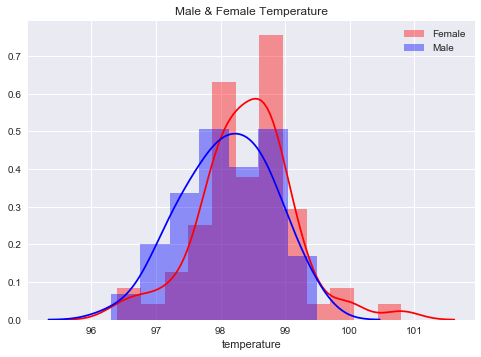

In [153]:
p1 = sns.distplot(df_female.temperature, color='red', label='Female')
p2 = sns.distplot(df_male.temperature, color='blue', label='Male')
plt.title('Male & Female Temperature')
plt.legend()
plt.show()

In [156]:
m_mean = np.mean(df_male.temperature)
m_std = np.std(df_male.temperature)
f_mean = np.mean(df_female.temperature)
f_std = np.std(df_female.temperature)
m_mean, f_mean

(98.1046153846154, 98.39384615384613)

In [155]:
x = (m_std**2 + f_std**2) /65
t = (m_mean - f_mean)/ math.sqrt(x)
v = x**2 / ( ( (m_std**2/65)**2 /64) + ( (f_std**2/65)**2/ 64) )
t, v

(-2.3032202891940123, 127.51030083039093)

## Conclusion

As a result, after performing hypothesis testing on the mean of the population with an unknown standard deviation, it can be concluded with high confidence that the true mean body temperature isnt 98.6. It can be stated that with 95% confidence level, the true mean lies somewhere in between [98.12, 98.38] confidence interval with a margin of error of 13%. Also, when the sample was split into male and female, it can be seen that the female body temperature contained higher body temperatures than male.